In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [16]:
# data_dir_full = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/'
# data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0] #0

# data_dir_full = db.query('sess_name=="e15_13f1_220119"')['data_dir_full'][0]
data_dir_full = db.query('sess_name=="e15_13f1_220117"')['data_dir_full'][0]


# load data
mat_to_return=prep.load_stuff(data_dir_full,sessionPulses='*SessionPulses.Events.mat')
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
behavior=mat_to_return['behavior']
# ripples = mat_to_return['ripples']
# cell_metrics = mat_to_return['cell_metrics']

prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
# prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=True,extra_load=dict(sessionPulses='*SessionPulses.Events.mat',filtered='*thetaFiltered.lfp.mat'))
spk_beh_df=prep_res['spk_beh_df']
_,spk_beh_df = dpp.group_into_trialtype(spk_beh_df)
# spk_beh_df,_=dpp.add_lin_binned(spk_beh_df,nbins=100)
spk_beh_df,_=dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
cell_cols_d = prep_res['cell_cols_d']
beh_df = prep_res['beh_df']
beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
spike_trains = prep_res['spike_trains']


load *SessionPulses.Events.mat failed


In [17]:
pf_res = pf.field_detection_both_avg_trial_wrapper(data_dir_full, dosave=False,force_reload=False, 
                                        save_fn = 'place_field_afterheadscan.p', 
                                        shuffle_fn='frmap_null_afterheadscan.p',load_only=True)

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan.p exists; loading---


In [23]:
# task_ind = 0
# fr_key = 'fr_peak'
# pf_fr = pd.concat(pf_res['params'],axis=0).loc[(slice(None),slice(None),fr_key),:]
# index=pf_fr.index.droplevel(2)
# pf_fr.index=index
# pf_fr = pf_fr.loc[task_ind]

In [18]:
index_within_to_trial_index_df = dpp.index_within_to_trial_index(spk_beh_df)

In [29]:
# task_ind = 0
# all_fields = pd.concat(pf_res['all_fields'],axis=0)
# all_fields = all_fields.loc[task_ind]
# # pf_fr = pf_res['params']

# splitter_fields,nonsplitter_fields, pf_fr_trialtype_combined_splitter, pf_fr_trialtype_combined_nonsplitter = pca.divide_central_fields_splitter_gather_params(all_fields,pf_fr,index_within_to_trial_index_df,task_ind=task_ind)






In [19]:
all_fields = pd.concat(pf_res['all_fields'],axis=0)
pf_params = pd.concat(pf_res['params'],axis=0)

In [14]:
import pf_recombine_central as prc

In [15]:
prc.main(data_dir_full)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan_recombine.p


{'all_fields_recombined':                        start end com peak    fr_peak    fr_mean  \
            field_index                                            
 0 0.0  11  1              53  77  65   71   8.130812   6.473083   
        27  0               0  11   5    6  15.942041  15.354884   
            1              31  39  34   33  15.388401  14.686598   
            3              93  99  96   99  13.294367  13.016145   
        35  1              62  67  64   64   2.783826   2.655959   
 ...                      ...  ..  ..  ...        ...        ...   
 1 both 250 0              10  30  19   15   1.840393   1.354449   
        252 0               9  26  16   15    5.32188   3.673316   
        253 0               0   4   1    0   3.211439   2.881859   
        261 0               0  10   5    6    4.94404   3.798589   
        266 0              25  32  28   29   2.202307   1.913377   
 
                         other_field_index  
            field_index                     

In [35]:
reload(pca)
pf_par_recombined_alltask, all_fields_recombined_alltask = pca.combine_pf_res(pf_params,all_fields,beh_df=beh_df)


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [36]:
import pf_recombine_central as pfrc

In [37]:
%%time
for ddf in db['data_dir_full']:
    pfrc.main(ddf,force_reload=True)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210302/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210312/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210314/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210314/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210315/py_data/place_field_afterheadscan.p exists; loading---
saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210315/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210317/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210319/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210319/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210322/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210322/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210331/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210331/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211119/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211124/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211124/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201013/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201013/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201017/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201017/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201019/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201019/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201022/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201022/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201017/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201017/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201019/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201019/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201118/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201118/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201121/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201121/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201125/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201125/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201129/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201129/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201206/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m3/e14_2m3_201208/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200716/py_data/place_field_afterheadscan.p exists; loading---
saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200716/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200719/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200719/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200723/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200723/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200727/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200727/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200803/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200803/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200809/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200809/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200812/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_10m1/e15_10m1_200812/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) /

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200715/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200717/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200717/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200720/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200720/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200723/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200723/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200729/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200729/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200802/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200802/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200809/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200809/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200823/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200823/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200824/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200824/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200917/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200917/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200918/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200918/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200919/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200920/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200920/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200923/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_200923/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201001/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201001/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201002/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201002/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_1f1/e16_1f1_201004/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201116/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201116/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201119/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201119/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201121/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201121/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201129/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201129/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201206/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_2m1/e16_2m1_201206/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210111/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210111/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210119/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210119/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210201/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210203/py_data/place_field_afterheadscan.p exists; loading---
saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m1/e16_3m1_210203/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211210/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211210/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211211/py_data/place_field_afterheadscan.p exists; loading---
saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211211/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / 

saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211212/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/ipshita_data/CA3_mEC/IZ32/IZ32_1008um_210303_sess7/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) /

saved at /mnt/home/szheng/ceph/ad/ipshita_data/CA3_mEC/IZ32/IZ32_1008um_210303_sess7/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/ipshita_data/CA3_mEC/IZ33/IZ33_580um_210312_sess8/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) /

saved at /mnt/home/szheng/ceph/ad/ipshita_data/CA3_mEC/IZ33/IZ33_580um_210312_sess8/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/ipshita_data/CA3_mEC/IZ33/IZ33_580um_210317_sess10/py_data/place_field_afterheadscan.p exists; loading---


Error in session: /mnt/home/szheng/ceph/ad/ipshita_data/CA3_mEC/IZ33/IZ33_580um_210315_sess9
Traceback (most recent call last):
  File "/mnt/home/szheng/projects/place_variability/code/pf_recombine_central.py", line 84, in main
    data = load_preprocess_data(session_path)
  File "/mnt/home/szheng/projects/place_variability/code/pf_recombine_central.py", line 39, in load_preprocess_data
    all_fields = pd.concat(pf_res['all_fields'],axis=0)
TypeError: 'NoneType' object is not subscriptable
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698

saved at /mnt/home/szheng/ceph/ad/ipshita_data/CA3_mEC/IZ33/IZ33_580um_210317_sess10/py_data/place_field_afterheadscan_recombine.p
/mnt/home/szheng/ceph/ad/ipshita_data/CA3_mEC/IZ33/IZ33_580um_210319_sess11/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/ipshita_data/CA3_mEC/IZ33/IZ33_580um_210319_sess11/py_data/place_field_afterheadscan_recombine.p
CPU times: user 1min 4s, sys: 10.3 s, total: 1min 14s
Wall time: 1min 51s


In [13]:
pf_par_recombined_alltask.loc[1,'std']

0         1         2         3         4         5   \
0.0  1   1       NaN       NaN       NaN       NaN       NaN  1.586301   
     11  1       NaN  5.010294       NaN  5.179376       NaN  4.124079   
     18  1       NaN       NaN       NaN       NaN       NaN       NaN   
     35  0       NaN  3.123546       NaN  3.597544       NaN  3.610747   
         1       NaN  1.554729       NaN  1.398360       NaN  1.411868   
...              ...       ...       ...       ...       ...       ...   
both 250 0  1.466978  1.885895  0.806211  4.133137  1.383483  4.649427   
     252 0  1.181127  3.111311  4.560856  4.636047  1.240575  2.919026   
     253 0       NaN  1.223574  2.515740  1.392171  2.494542  0.672115   
     261 0       NaN  1.020650       NaN       NaN  2.157698  3.305098   
     266 0  2.045055       NaN       NaN       NaN  0.000000       NaN   

                  6         7         8         9   ...  37  38  39  40  41  \
0.0  1   1       NaN       NaN       NaN  1.856627  ... NaN NaN NaN NaN NaN   
     11  1       NaN       NaN  4.154788  4.345005  ... NaN NaN NaN NaN NaN   
     18  1       NaN       NaN       NaN       NaN  ... NaN NaN NaN NaN NaN   
     35  0       NaN       NaN  3.811213  3.669417  ... NaN NaN NaN NaN NaN   
         1       NaN       NaN  0.974694  1.370748  ... NaN NaN NaN NaN NaN   
...              ...       ...       ...       ...  ...  ..  ..  ..  ..  ..   
both 250 0       NaN  1.528081  5.252907  4.913636  ... NaN NaN NaN NaN NaN   
     252 0  4.698907  2.942864  3.721627  3.266674  ... NaN NaN NaN NaN NaN   
     253 0  2.089307  2.496435  1.370531  1.208229  ... NaN NaN NaN NaN NaN   
     261 0  1.317893  2.189779  2.498938  2.912386  ... NaN NaN NaN NaN NaN   
     266 0       NaN  0.475801  1.940475  1.443316  ... NaN NaN NaN NaN NaN   

            42  43  44  45  46  
0.0  1   1 NaN NaN NaN NaN NaN  
     11  1 NaN NaN NaN NaN NaN  
     18  1 NaN NaN NaN NaN NaN  
     35  0 NaN NaN NaN NaN NaN  
         1 NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  
both 250 0 NaN NaN NaN NaN NaN  
     252 0 NaN NaN NaN NaN NaN  
     253 0 NaN NaN NaN NaN NaN  
     261 0 NaN NaN NaN NaN NaN  
     266 0 NaN NaN NaN NaN NaN  

[355 rows x 47 columns]

In [21]:
from process_central_arm import find_left_right_similar_fields,get_central_fields,combine_left_right_simlar_fields




In [29]:
reload(pca)
combine_left_right_simlar_fields = pca.combine_left_right_simlar_fields
get_left_right_intensity_difference = pca.get_left_right_intensity_difference

In [30]:
speed_key = 'directed_locomotion'
speed_thresh = 0.5
corners_d,xy_sampled_d,segment_d=dpp.find_tmaze_turns(beh_df,speed_key=speed_key,speed_thresh=speed_thresh)

task_l = beh_df.groupby('task_index')['task'].first()


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [31]:
corners_df = pd.concat(corners_d)

In [34]:
kwargs_ = {'similar_thresh_in_bin':5,'loc_key':'peak','fr_key':'fr_peak'}
# pf_params = pf_params.swaplevel(0,2).swaplevel(1,2)
task_ind_l = all_fields.index.get_level_values(0).unique()
all_fields_one_recombined_alltask = {}
pf_par_recombined_alltask = {}
for task_ind in task_ind_l:
    task = task_l[task_ind]
    if task_ind in corners_df.index.get_level_values(0):
        central_arm_bounds = np.array([0,corners_df.loc[0]['lin'].loc[(slice(None),1)].mean()]) 

    if 'alternation' in task.lower():
        all_fields_one = all_fields.loc[task_ind]
        pf_params_one = pf_params.loc[task_ind]
        pf_fr_one = pf_params_one.loc[(slice(None),kwargs_['fr_key']),:].droplevel(1) # drop the fr_key level

        # get fields similar in location in left and right trials
        left_right_similar_fields=find_left_right_similar_fields(all_fields_one,similar_thresh_in_bin=kwargs_['similar_thresh_in_bin'],loc_key=kwargs_['loc_key'])

        # among those fields, get the fields on the central arm
        central_fields_all_trialtype = get_central_fields(all_fields_one,central_arm_bounds_cm = central_arm_bounds)
        central_lrsim_inds = left_right_similar_fields.index.intersection(central_fields_all_trialtype.loc[0].index)
        central_lrsim_fields = left_right_similar_fields.loc[central_lrsim_inds]

        noncentral_fields_all_trialtype_inds = [x for x in all_fields_one.index if x not in central_fields_all_trialtype.index]
        noncentral_fields_all_trialtype = all_fields_one.loc[noncentral_fields_all_trialtype_inds]

        # combine trial types for the central left_right location similar cells
        pf_fr_trialtype_combined = combine_left_right_simlar_fields(pf_fr_one,selected_fields=central_lrsim_fields, index_within_to_trial_index_df=index_within_to_trial_index_df.loc[task_ind])

        # test the left right firing rate differences for the l-r location similar cells
        lr_fr_diff = get_left_right_intensity_difference(pf_fr_trialtype_combined, index_within_to_trial_index_df.loc[task_ind])
        alpha = 0.05
        nonsplitter_inds = lr_fr_diff.loc[lr_fr_diff['pval'] >= alpha].index
        splitter_inds = lr_fr_diff.loc[lr_fr_diff['pval'] < alpha].index
        splitter_fields = central_lrsim_fields.loc[splitter_inds] 
        nonsplitter_fields = central_lrsim_fields.loc[nonsplitter_inds] # this will be NEEDED!

        # prepare nonsplitter fields to be added
        nonsplitter_fields_both = pd.concat({0:nonsplitter_fields.drop('other_field_index',axis=1),
        1:nonsplitter_fields.droplevel(1).set_index('other_field_index',append=True)},axis=0) # don't use, just use the index
        nonsplitter_fields_both_ind = nonsplitter_fields_both.index
        nonsplitter_fields_added_index = nonsplitter_fields.assign(trial_type='both')
        nonsplitter_fields_added_index=nonsplitter_fields_added_index.set_index('trial_type',append=True).swaplevel(0,2).swaplevel(1,2)

        # get fields that should be seperated by trialtype
        trialtype_seperate_fields_ind = all_fields_one.index.difference(nonsplitter_fields_both_ind)

        # combine all fields
        all_fields_one_recombined = pd.concat([all_fields_one.loc[trialtype_seperate_fields_ind],nonsplitter_fields_added_index],axis=0)
        all_fields_one_recombined_alltask[task_ind] = all_fields_one_recombined

        # combine pf_params
        pf_params_gpb = pf_params_one.groupby(level=1)
        pf_par_recombined_d = {}
        for par_key,pf_par in pf_params_gpb:
#             if par_key=='std':
                
            pf_par = pf_par.droplevel(1)

            # combine pf_params for nonsplitter
            nonsplitter_pf_param_combined = combine_left_right_simlar_fields(pf_par,nonsplitter_fields,index_within_to_trial_index_df.loc[task_ind])

            # combine pf_params for trialtype seperate fields
            index_within_to_trial_index_df_onetask = index_within_to_trial_index_df.loc[task_ind]
            gpb = pf_par.loc[trialtype_seperate_fields_ind].groupby(level=0)
            pf_par_trialtype_seperate_fields = {}
            for tt,val in gpb:
                val = val.loc[tt]
                val = val.dropna(axis=1,how='all')
                cols = val.columns
                index_within_to_trial_index_df_onett = index_within_to_trial_index_df_onetask.loc[tt]
                common_index_within = cols.intersection(index_within_to_trial_index_df_onett.index)
                val = val[common_index_within]
                val.columns = index_within_to_trial_index_df_onett.loc[common_index_within]
                pf_par_trialtype_seperate_fields[tt] = val
            pf_par_trialtype_seperate_fields = pd.concat(pf_par_trialtype_seperate_fields)
            pf_par_trialtype_seperate_fields = pf_par_trialtype_seperate_fields.sort_index(axis=1)

            nonsplitter_pf_param_combined_index_added=pd.concat({'both':nonsplitter_pf_param_combined})
            pf_par_recombined = pd.concat([pf_par_trialtype_seperate_fields,nonsplitter_pf_param_combined_index_added],axis=0)
            pf_par_recombined_d[par_key] = pf_par_recombined
        pf_par_recombined_d = pd.concat(pf_par_recombined_d)
        pf_par_recombined_alltask[task_ind] = pf_par_recombined_d
    elif 'linear' in task.lower(): 
        all_fields_one_recombined_alltask[task_ind] = all_fields_one
        pf_par_recombined_alltask[task_ind] = pf_params_one
    else:
        raise NotImplementedError
        
all_fields_one_recombined_alltask = pd.concat(all_fields_one_recombined_alltask)
pf_par_recombined_alltask = pd.concat(pf_par_recombined_alltask)


In [33]:
pf_par_recombined_d

{}

In [26]:
pf_par_recombined_alltask

{}

In [351]:
pf_par.loc[0].loc[non]

0         1         2         3         4         5         6   \
1   0       NaN       NaN       NaN       NaN       NaN       NaN  1.382254   
    1       NaN       NaN  1.586301       NaN  1.856627  0.843549  2.565334   
11  0  5.656135  5.461087  7.102778  5.501530  4.097834  4.912506  4.505715   
    1  5.010294  5.179376  4.124079  4.154788  4.345005  4.910323  3.353927   
18  1       NaN       NaN       NaN       NaN       NaN  1.105582  1.092329   
...         ...       ...       ...       ...       ...       ...       ...   
263 0       NaN  2.709619  0.947230       NaN  1.286629  0.769127  0.832841   
264 0  6.145242  6.417539  5.565164  6.174407  5.363069  6.287898  4.511522   
266 0       NaN       NaN       NaN  1.940475  1.443316       NaN       NaN   
    1  1.529255  1.886928  1.852999       NaN       NaN  1.729178       NaN   
270 0  2.650375       NaN       NaN  3.124385       NaN       NaN       NaN   

             7         8         9   ...        17        18        19  \
1   0       NaN  1.400462       NaN  ...  1.654415  1.462735  1.679824   
    1  1.778294  2.122394  2.260353  ...  2.116648  2.587289  2.444076   
11  0  5.227333  6.387162  6.342151  ...  6.449487  7.394347  7.959607   
    1  3.847713  4.508694  3.325762  ...  5.463605  2.564636  4.028322   
18  1       NaN       NaN  1.068888  ...  1.023819       NaN       NaN   
...         ...       ...       ...  ...       ...       ...       ...   
263 0  2.509643  2.627508  3.726808  ...  2.488063  3.142016  3.122548   
264 0  5.585766  5.339810  4.997445  ...  6.151060  4.143747  4.556968   
266 0  0.381586  1.356359       NaN  ...  2.074688  1.763996  2.036606   
    1       NaN       NaN  3.765259  ...  2.622441  2.454305  2.678578   
270 0       NaN  2.216897       NaN  ...  2.115198  2.370844  2.409530   

             20  21  22  23  24  25  26  
1   0  1.638660 NaN NaN NaN NaN NaN NaN  
    1  2.644448 NaN NaN NaN NaN NaN NaN  
11  0  7.542164 NaN NaN NaN NaN NaN NaN  
    1  3.529414 NaN NaN NaN NaN NaN NaN  
18  1       NaN NaN NaN NaN NaN NaN NaN  
...         ...  ..  ..  ..  ..  ..  ..  
263 0  1.013883 NaN NaN NaN NaN NaN NaN  
264 0  3.862639 NaN NaN NaN NaN NaN NaN  
266 0  1.969772 NaN NaN NaN NaN NaN NaN  
    1  2.391694 NaN NaN NaN NaN NaN NaN  
270 0  2.177035 NaN NaN NaN NaN NaN NaN  

[220 rows x 27 columns]

In [347]:
nonsplitter_fields

,,start,end,com,peak,fr_peak,fr_mean,other_field_index
1,0,0,5,2,0,2.554116,2.085204,0
11,0,0,23,11,16,4.653707,3.676455,0
44,0,8,15,11,12,3.606172,3.371826,0
46,0,0,20,9,8,11.744628,9.235292,0
55,0,3,21,11,12,6.709979,5.31907,0
63,0,0,7,3,5,4.401321,4.235575,0
67,0,13,23,17,17,12.726584,11.280047,0
70,0,1,14,7,7,3.421427,2.768303,0
81,0,11,15,13,13,2.737345,2.644208,0
83,0,0,10,5,6,6.683021,5.458823,0


In [342]:
pf_params_one.loc[1,'std']

/tmp/ipykernel_372699/2687511163.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  pf_params_one.loc[1,'std']


0         1         2         3         4         5         6   \
1   0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11  0  2.905439  2.588076  3.030009  2.085326  3.461070  3.042725  2.879357   
18  0  2.571807  1.042873  2.325945  0.791336       NaN  1.059972       NaN   
27  0  2.245434  2.257847  2.327304  2.229112  2.154485  2.181985  2.365412   
    2  1.736360  1.744873  1.694238  1.665328  1.679717  1.676997  1.686586   
...         ...       ...       ...       ...       ...       ...       ...   
264 0  2.572410  2.522044  2.263275  2.274505  2.081123  2.326574  1.178781   
266 0  2.045055       NaN  0.000000       NaN  0.475801  0.359788       NaN   
267 0  1.381120       NaN       NaN       NaN       NaN       NaN       NaN   
270 0  3.555117  2.270541  2.318169  2.381947       NaN  2.564903  2.747300   
    1  2.447564       NaN       NaN  1.365389  2.456671  2.056578  2.648068   

             7         8         9   ...  17  18  19  20  21  22  23  24  25  \
1   0  1.197776  0.665364       NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
11  0  2.926255  2.990920  3.059686  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
18  0  1.471627  2.647429  1.268710  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
27  0  2.236313  2.236701  2.315682  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
    2  1.686449  1.663806  1.613135  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
...         ...       ...       ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
264 0  2.499952  2.557872  2.417659  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
266 0  1.974252  2.235872  2.136166  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
267 0  1.290248  1.386815  1.381738  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
270 0  2.965525  3.539963  2.782041  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   
    1  2.722551  2.330648  2.366346  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN   

       26  
1   0 NaN  
11  0 NaN  
18  0 NaN  
27  0 NaN  
    2 NaN  
...    ..  
264 0 NaN  
266 0 NaN  
267 0 NaN  
270 0 NaN  
    1 NaN  

[175 rows x 27 columns]

In [360]:
pf_par_recombined_alltask.loc[1,'std','both']

,,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
all_fields_one_recombined_alltask.loc[1,'both']

,,start,end,com,peak,fr_peak,fr_mean,other_field_index
,field_index,,,,,,,
1,0,0,5,2,0,2.554116,2.085204,0.0
11,0,0,23,11,16,4.653707,3.676455,0.0
44,0,8,15,11,12,3.606172,3.371826,0.0
46,0,0,20,9,8,11.744628,9.235292,0.0
55,0,3,21,11,12,6.709979,5.31907,0.0
63,0,0,7,3,5,4.401321,4.235575,0.0
67,0,13,23,17,17,12.726584,11.280047,0.0
70,0,1,14,7,7,3.421427,2.768303,0.0
81,0,11,15,13,13,2.737345,2.644208,0.0


In [286]:
all_fields_one_recombined_alltask.loc[1,0]

start end com peak    fr_peak    fr_mean  other_field_index
    field_index                                                            
42  1              36  45  40   40    9.65561   7.829082                NaN
    2              83  99  91   91  20.426195  13.764812                NaN
43  0               4  30  19   23  10.051708   5.274427                NaN
    1              71  77  73   74   2.998244   2.844559                NaN
47  1              68  78  73   74   7.488194   6.502278                NaN
...               ...  ..  ..  ...        ...        ...                ...
293 0              58  69  63   63   2.896952   1.814461                NaN
295 0               0  10   4    3   6.316875    4.82038                NaN
297 0              28  49  38   33   3.501972   2.479724                NaN
299 1              71  83  76   77   2.027511   1.143457                NaN
302 1              86  99  93   93   4.989363   2.689842                NaN

[309 rows x 7 columns]

In [267]:
pf_par_recombined_alltask

0   1          2   3          4   5          6   7   \
0 com 0.0  42  1  41.124312 NaN  41.236234 NaN  40.826256 NaN  40.778626 NaN   
               2  90.441580 NaN  90.380357 NaN  90.635464 NaN  89.606912 NaN   
           43  1  73.856527 NaN  73.709282 NaN  73.720676 NaN  72.323672 NaN   
           47  1  73.602193 NaN  72.889776 NaN  72.674335 NaN  72.922027 NaN   
               2  95.560682 NaN  95.110033 NaN  95.100541 NaN  95.226890 NaN   
...                     ...  ..        ...  ..        ...  ..        ...  ..   
1 std both 214 0        NaN NaN        NaN NaN        NaN NaN        NaN NaN   
           220 0        NaN NaN        NaN NaN        NaN NaN        NaN NaN   
           246 0        NaN NaN        NaN NaN        NaN NaN        NaN NaN   
           249 0        NaN NaN        NaN NaN        NaN NaN        NaN NaN   
           282 0        NaN NaN        NaN NaN        NaN NaN        NaN NaN   

                         8          9   ...         39        40         41  \
0 com 0.0  42  1  40.952515  41.577919  ...  39.793794       NaN  39.474831   
               2  91.465479  91.396426  ...  90.648791       NaN  90.686009   
           43  1  74.536999  74.313487  ...  73.620998       NaN  74.469196   
           47  1  73.359407  73.396810  ...  74.925655       NaN  72.980507   
               2  95.076865  95.743980  ...  95.203311       NaN  94.486339   
...                     ...        ...  ...        ...       ...        ...   
1 std both 214 0        NaN        NaN  ...        NaN  4.887088        NaN   
           220 0        NaN        NaN  ...        NaN  2.982875        NaN   
           246 0        NaN        NaN  ...        NaN  5.958422        NaN   
           249 0        NaN        NaN  ...        NaN  1.877253        NaN   
           282 0        NaN        NaN  ...        NaN  3.924179        NaN   

                        42         43         44         45  46  47  48  
0 com 0.0  42  1       NaN  40.860126  39.298015  40.484028 NaN NaN NaN  
               2       NaN  91.285973  90.977870  90.174549 NaN NaN NaN  
           43  1       NaN  73.803795  75.014997  74.761523 NaN NaN NaN  
           47  1       NaN  72.830999  72.491735  71.937268 NaN NaN NaN  
               2       NaN  94.419950  95.027915  94.605156 NaN NaN NaN  
...                    ...        ...        ...        ...  ..  ..  ..  
1 std both 214 0  3.798421        NaN   3.735513        NaN NaN NaN NaN  
           220 0  2.922281        NaN   4.046802        NaN NaN NaN NaN  
           246 0  5.566828        NaN   6.284428        NaN NaN NaN NaN  
           249 0  1.816984        NaN   1.845305        NaN NaN NaN NaN  
           282 0  3.823492        NaN   3.237642        NaN NaN NaN NaN  

[3830 rows x 49 columns]

In [266]:
all_fields

start end com peak    fr_peak    fr_mean
          field_index                                         
0 0.0 42  1              36  45  40   40    9.65561   7.829082
          2              83  99  91   91  20.426195  13.764812
      43  0               4  30  19   23  10.051708   5.274427
          1              71  77  73   74   2.998244   2.844559
      47  1              68  78  73   74   7.488194   6.502278
...                     ...  ..  ..  ...        ...        ...
1 1.0 284 0              17  37  27   24   2.309329   1.887558
      287 0              15  33  23   24   4.360173   2.875809
      288 0              31  37  34   37   1.022591   0.842145
      298 0               7  23  14   14   8.469141   5.147013
      302 0              14  37  24   22   3.850951   2.793273

[829 rows x 6 columns]

In [265]:
all_fields_one_recombined_alltask

start end com peak    fr_peak    fr_mean  \
           field_index                                            
0 0.0  42  1              36  45  40   40    9.65561   7.829082   
           2              83  99  91   91  20.426195  13.764812   
       43  1              71  77  73   74   2.998244   2.844559   
       47  1              68  78  73   74   7.488194   6.502278   
           2              91  99  95   95  10.045215   8.063177   
...                      ...  ..  ..  ...        ...        ...   
1 both 214 0               8  26  16   16   6.829624   4.725342   
       220 0               8  24  16   17   4.119655   2.431741   
       246 0               8  33  19   17   13.73954   8.813578   
       249 0               8  16  10    8   1.645549   1.072171   
       282 0               8  22  13   11  11.182412   7.571458   

                        other_field_index  
           field_index                     
0 0.0  42  1                          NaN  
           2                          NaN  
       43  1                          NaN  
       47  1                          NaN  
           2                          NaN  
...                                   ...  
1 both 214 0                          0.0  
       220 0                          0.0  
       246 0                          0.0  
       249 0                          0.0  
       282 0                          0.0  

[766 rows x 7 columns]

In [260]:
common_index_within

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [261]:
pf_params_one.loc[(slice(None),'com'),:]

0          1          2          3          4   \
0.0 com 42  0  20.015130  18.766173  19.326551  19.779928  19.158100   
            1  34.690894  38.560658  38.608718  36.896769  38.459338   
        47  0  39.707336  39.833101  32.289534  35.292166  36.969590   
        48  0  19.380388  18.971216  18.770414  19.482479  19.504274   
        51  1  36.319632  33.718145  33.687688  34.649960  33.777947   
...                  ...        ...        ...        ...        ...   
1.0 com 284 0  20.193292  33.810249  26.860273  27.465828  25.769404   
        287 0  20.570734  22.568771  21.360563  22.984004  22.740462   
        288 0  31.176188  34.330998  33.408084  33.860744        NaN   
        298 0        NaN        NaN        NaN        NaN        NaN   
        302 0  17.327721  25.039160  23.289957  25.551944  21.551428   

                      5          6          7          8          9   ...  \
0.0 com 42  0  19.819166  19.274421  19.637817  20.073083  20.416422  ...   
            1  36.854875  39.495153  36.486368  38.829292  37.092059  ...   
        47  0  36.707181  34.353787  35.738046  37.318620  37.644913  ...   
        48  0  19.622728  19.724462  20.205753  20.481813  19.538277  ...   
        51  1  33.754739  35.034033  34.185040  33.678933  33.827498  ...   
...                  ...        ...        ...        ...        ...  ...   
1.0 com 284 0  25.736319  24.817841  25.283682  24.419404  28.108562  ...   
        287 0  24.443354  23.463866  21.267909  23.820395  27.149992  ...   
        288 0        NaN        NaN        NaN        NaN  33.956171  ...   
        298 0        NaN        NaN        NaN        NaN        NaN  ...   
        302 0  23.484095  23.732855  23.272885  23.742694  26.066926  ...   

                      17         18         19         20         21  \
0.0 com 42  0  19.124421  20.097687  19.958287  20.692832  19.561175   
            1  38.488957  38.533138  38.319921  36.686097  36.603234   
        47  0  36.094071  37.589013  37.761514  36.701880  36.009160   
        48  0  19.369999  19.088738  19.300756  19.403582  19.009424   
        51  1  34.884586  35.316743  35.142701  34.497079  34.766635   
...                  ...        ...        ...        ...        ...   
1.0 com 284 0        NaN  24.344613  27.431785  25.176355        NaN   
        287 0  23.393760  24.695507  24.251900  27.068809  24.569655   
        288 0  33.712812        NaN        NaN        NaN  34.023267   
        298 0  15.181254  12.276520  15.014550  14.492928  16.018543   
        302 0  29.519026  23.628860  25.397660        NaN  27.608415   

                      22         23         24  25  26  
0.0 com 42  0  20.172706  20.813772  19.676635 NaN NaN  
            1  37.095501  35.906491  39.383749 NaN NaN  
        47  0  35.124081  35.878705  37.302266 NaN NaN  
        48  0  19.098460  19.154297  19.460098 NaN NaN  
        51  1  34.200270  34.153747  36.130700 NaN NaN  
...                  ...        ...        ...  ..  ..  
1.0 com 284 0  22.599386  25.377589        NaN NaN NaN  
        287 0  25.554302  26.180228        NaN NaN NaN  
        288 0        NaN  33.870713        NaN NaN NaN  
        298 0  15.395803  16.067372        NaN NaN NaN  
        302 0  28.950642  27.115966        NaN NaN NaN  

[225 rows x 27 columns]

In [262]:
pf_par_recombined_d.loc['com']

0   1          2   3          4   5          6   7   \
0.0  42  0  20.015130 NaN  18.766173 NaN  19.326551 NaN  19.779928 NaN   
         1  34.690894 NaN  38.560658 NaN  38.608718 NaN  36.896769 NaN   
     47  0  39.707336 NaN  39.833101 NaN  32.289534 NaN  35.292166 NaN   
     48  0  19.380388 NaN  18.971216 NaN  18.770414 NaN  19.482479 NaN   
     51  1  36.319632 NaN  33.718145 NaN  33.687688 NaN  34.649960 NaN   
...               ...  ..        ...  ..        ...  ..        ...  ..   
both 214 0        NaN NaN        NaN NaN        NaN NaN        NaN NaN   
     220 0        NaN NaN        NaN NaN        NaN NaN        NaN NaN   
     246 0        NaN NaN        NaN NaN        NaN NaN        NaN NaN   
     249 0        NaN NaN        NaN NaN        NaN NaN        NaN NaN   
     282 0        NaN NaN        NaN NaN        NaN NaN        NaN NaN   

                   8   9   ...  39         40  41         42  43         44  \
0.0  42  0  19.158100 NaN  ... NaN  20.692832 NaN  19.561175 NaN  20.172706   
         1  38.459338 NaN  ... NaN  36.686097 NaN  36.603234 NaN  37.095501   
     47  0  36.969590 NaN  ... NaN  36.701880 NaN  36.009160 NaN  35.124081   
     48  0  19.504274 NaN  ... NaN  19.403582 NaN  19.009424 NaN  19.098460   
     51  1  33.777947 NaN  ... NaN  34.497079 NaN  34.766635 NaN  34.200270   
...               ...  ..  ...  ..        ...  ..        ...  ..        ...   
both 214 0        NaN NaN  ... NaN  17.867630 NaN  17.353422 NaN  16.459771   
     220 0        NaN NaN  ... NaN  14.725433 NaN  17.863006 NaN  17.081786   
     246 0        NaN NaN  ... NaN  20.397438 NaN  19.914427 NaN  20.876248   
     249 0        NaN NaN  ... NaN  10.034363 NaN   9.936237 NaN   9.991171   
     282 0        NaN NaN  ... NaN  13.517194 NaN  13.102739 NaN  11.653187   

            45         46  47         48  
0.0  42  0 NaN  20.813772 NaN  19.676635  
         1 NaN  35.906491 NaN  39.383749  
     47  0 NaN  35.878705 NaN  37.302266  
     48  0 NaN  19.154297 NaN  19.460098  
     51  1 NaN  34.153747 NaN  36.130700  
...         ..        ...  ..        ...  
both 214 0 NaN        NaN NaN        NaN  
     220 0 NaN        NaN NaN        NaN  
     246 0 NaN        NaN NaN        NaN  
     249 0 NaN        NaN NaN        NaN  
     282 0 NaN        NaN NaN        NaN  

[213 rows x 49 columns]

In [243]:
pf_par_recombined

0          1          2          3         4          5   \
0.0  42  0  14.854896        NaN   5.543880        NaN  5.430077        NaN   
         1   5.590287        NaN  10.828172        NaN  9.615098        NaN   
     47  0   0.912769        NaN   1.078350        NaN  2.208477        NaN   
     48  0   3.390695        NaN   3.784980        NaN  7.688022        NaN   
     51  1   0.779715        NaN   2.820855        NaN  2.507597        NaN   
...               ...        ...        ...        ...       ...        ...   
both 214 0   7.763269   8.083922  10.873271  12.364588  6.357105   5.216544   
     220 0   8.018087   8.045491  12.695068  15.526866  8.301033  11.530645   
     246 0  12.020818  13.714048  14.917572  12.697904  8.841028   8.120473   
     249 0   0.000000   0.000000   0.000000   0.000000  0.287205   0.000000   
     282 0   0.599243   8.802302  11.128524   9.273524  3.989377  12.485823   

                  6         7         8          9   ...         39  \
0.0  42  0  8.215379       NaN  4.782396        NaN  ...        NaN   
         1  9.872458       NaN  5.860364        NaN  ...        NaN   
     47  0  5.529037       NaN  4.750571        NaN  ...        NaN   
     48  0  9.838058       NaN  8.108422        NaN  ...        NaN   
     51  1  2.714407       NaN  0.583533        NaN  ...        NaN   
...              ...       ...       ...        ...  ...        ...   
both 214 0  3.401252  3.758872  3.309732   3.279889  ...  12.435185   
     220 0  4.641925  6.589818  2.856278   4.410673  ...   0.000000   
     246 0  6.853590  3.086482  5.093451   3.349363  ...  22.916571   
     249 0  0.000000  0.000000  0.000000   0.896999  ...   0.000000   
     282 0  6.877784  7.774743  2.607377  14.437318  ...  15.345527   

                   40        41         42         43         44        45  \
0.0  42  0  10.820275       NaN   3.785546        NaN   6.481835       NaN   
         1   9.503314       NaN  12.630276        NaN  20.117031       NaN   
     47  0   9.493812       NaN  10.541935        NaN  11.791019       NaN   
     48  0   8.847891       NaN   7.654032        NaN  13.980586       NaN   
     51  1   3.303277       NaN   3.608525        NaN   4.581800       NaN   
...               ...       ...        ...        ...        ...       ...   
both 214 0   4.081765  7.617324   3.982205   7.448745   6.196188  9.858930   
     220 0   0.162095  0.000000   0.795946   0.000000   0.398962  0.000000   
     246 0   8.744382  8.085716   7.944300  12.742855   8.578227  8.811092   
     249 0   1.542776  0.511642   1.478874   1.222854   1.564828  0.545915   
     282 0   8.709476  3.735636   8.118290   6.730860   9.801619  9.031153   

                   46        47         48  
0.0  42  0   6.375989       NaN   6.581541  
         1   9.943547       NaN  23.226752  
     47  0   7.762380       NaN  16.335989  
     48  0   8.772420       NaN   9.210257  
     51  1   3.430582       NaN   5.061274  
...               ...       ...        ...  
both 214 0  10.052270  7.521679   3.607068  
     220 0   0.344991  0.000000   0.000000  
     246 0  12.341470  8.276290  11.574712  
     249 0   0.000000  0.830122   2.292269  
     282 0   3.036682  7.530479   8.680682  

[213 rows x 49 columns]

In [ ]:
def divide_central_fields_splitter_gather_params(all_fields,pf_fr,index_within_to_trial_index_df,task_ind=0,**kwargs):
    '''
    all_fields: from eg. pf_res['avg']['all_fields'].loc[task_ind], (trial_ind x neuron x field) x [start, end, com, peak, fr_peak, fr_mean]
    pf_fr: from eg. 
            fr_key = 'fr_peak'
            pf_fr = pd.concat(pf_res['avg']['params'],axis=0).loc[(slice(None),slice(None),fr_key),:]
            index=pf_fr.index.droplevel(2)
            pf_fr.index=index
            pf_fr = pf_fr.loc[task_ind]
    index_within_to_trial_index_df: 
    
    '''
    kwargs_ = {'similar_thresh_in_bin':5,'loc_key':'peak'}
    kwargs_.update(kwargs)

    # get fields similar in location in left and right trials
    left_right_similar_fields=find_left_right_similar_fields(all_fields,similar_thresh_in_bin=kwargs_['similar_thresh_in_bin'],loc_key=kwargs_['loc_key'])
    
    # among those fields, get the fields on the central arm
    central_fields_all_trialtype = get_central_fields(all_fields)
    central_lrsim_inds = left_right_similar_fields.index.intersection(central_fields_all_trialtype.loc[0].index)
    central_lrsim_fields = left_right_similar_fields.loc[central_lrsim_inds]

    # combine trial types for the central left_right location similar cells
    pf_fr_trialtype_combined = combine_left_right_simlar_fields(pf_fr,selected_fields=central_lrsim_fields, index_within_to_trial_index_df=index_within_to_trial_index_df.loc[task_ind])

    # test the left right firing rate differences for the l-r location similar cells
    lr_fr_diff = get_left_right_intensity_difference(pf_fr_trialtype_combined, index_within_to_trial_index_df.loc[task_ind])
    alpha = 0.05
    nonsplitter_inds = lr_fr_diff.loc[lr_fr_diff['pval'] >= alpha].index
    splitter_inds = lr_fr_diff.loc[lr_fr_diff['pval'] < alpha].index
    splitter_fields = central_lrsim_fields.loc[splitter_inds] 
    nonsplitter_fields = central_lrsim_fields.loc[nonsplitter_inds] # this will be NEEDED!

    pf_fr_trialtype_combined_nonsplitter = pf_fr_trialtype_combined.loc[nonsplitter_inds]
    pf_fr_trialtype_combined_splitter = pf_fr_trialtype_combined.loc[splitter_inds]
    
    return splitter_fields,nonsplitter_fields, pf_fr_trialtype_combined_splitter, pf_fr_trialtype_combined_nonsplitter

In [36]:
scipy.stats.ttest_ind(pf_fr_trialtype_combined_splitter.loc[78].loc[0],pf_fr_trialtype_combined_splitter.loc[78].loc[1])




Ttest_indResult(statistic=-1.1548020532894714, pvalue=0.25122845149194606)

<AxesSubplot:>

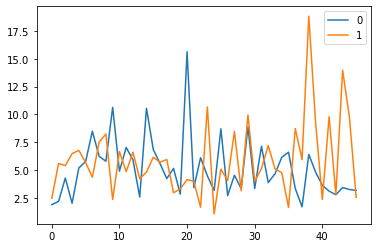

In [34]:
pf_fr_trialtype_combined_splitter.loc[78].T.plot()